In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, pearsonr
from IPython.display import display



In [6]:
datasetA = pd.read_csv("../data/processed/datasetA.csv")
datasetB = pd.read_csv("../data/raw/French_cities_2005.csv", sep="\t")
dataset_large_simple = pd.read_csv("../data/processed/dataset_large_simple.csv")
dataset_small_rich = pd.read_csv("../data/processed/dataset_small_rich.csv")
dataset_large_rich = pd.read_csv("../data/processed/dataset_large_rich_filled_final.csv")


In [7]:
dataset_large_simple['political_group'] = np.where(dataset_large_simple['vote_macron_share'] >= 50, 'Macron', 'Le Pen')
dataset_large_simple.groupby('political_group')['log_gender_gap'].mean()


political_group
Le Pen    0.175922
Macron    0.188332
Name: log_gender_gap, dtype: float64

In [4]:
dataset_large_simple['city_size'] = np.where(dataset_large_simple['population_total'] >= dataset_large_simple['population_total'].median(), 'Large', 'Small')
dataset_large_simple.groupby('city_size')['log_gender_gap'].mean()


city_size
Large    0.180245
Small    0.188602
Name: log_gender_gap, dtype: float64

In [ ]:
def data_snapshot(df, name):
    print(f"\n{'='*50}")
    print(f"{name} Dataset Snapshot")
    print(f"{'='*50}")
    

    print(f"shape: {df.shape}")
    
  
    print("\Basic Information:")
    print(df.info())
    
    print("\nMissing Values:")
    missing_data = df.isnull().sum()
    print(missing_data[missing_data > 0]) 
    
   
    print("\nDescriptive Statistics for Numeric Variables:")
    numeric_df = df.select_dtypes(include=[np.number])
    if not numeric_df.empty:
        print(numeric_df.describe())
    
  
    print("\nDescriptive statistics for categorical variables:")
    categorical_df = df.select_dtypes(include=['object'])
    if not categorical_df.empty:
        print(categorical_df.describe())
    

    if 'log_gender_gap' in df.columns:
        print("\nTarget Variable log_gender_gap Detailed Statistics:")
        print(df['log_gender_gap'].describe())
        
        from scipy.stats import skew, kurtosis
        print(f"\nSkewness: {skew(df['log_gender_gap'].dropna()):.4f}")
        print(f"Kurtosis: {kurtosis(df['log_gender_gap'].dropna()):.4f}")


data_snapshot(dataset_large_simple, "Large Simple")
data_snapshot(dataset_small_rich, "Small Rich")
data_snapshot(dataset_large_rich, "Large Rich")


Large Simple Dataset Snapshot
shape: (5263, 14)
\Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5263 entries, 0 to 5262
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_code          5263 non-null   object 
 1   city_name          5263 non-null   object 
 2   avg_salary         5263 non-null   float64
 3   avg_salary_female  5263 non-null   float64
 4   avg_salary_male    5263 non-null   float64
 5   log_gender_gap     5263 non-null   float64
 6   population_total   5263 non-null   int64  
 7   population_30_44   5263 non-null   float64
 8   population_female  5263 non-null   float64
 9   population_cs3     5263 non-null   float64
 10  latitude           5263 non-null   float64
 11  longitude          5263 non-null   float64
 12  vote_macron_share  5263 non-null   float64
 13  political_group    5263 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 5

In [9]:
def save_summary_statistics(df, name):
    numeric_df = df.select_dtypes(include=[np.number])
    if not numeric_df.empty:
        summary = numeric_df.describe().round(4)
        summary.to_csv(f"{name}_summary_statistics.csv") 

save_summary_statistics(dataset_large_simple, "large_simple")
save_summary_statistics(dataset_small_rich, "small_rich")
save_summary_statistics(dataset_large_rich, "large_rich")

Kernel Density Estimation

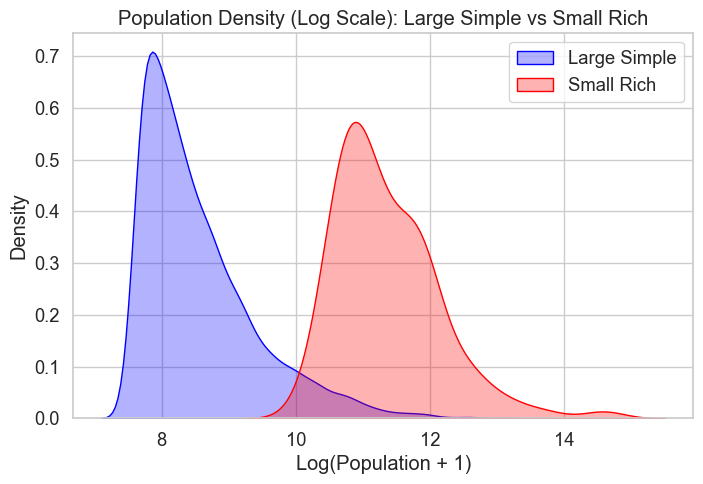

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", font_scale=1.2)


plt.figure(figsize=(8,5))
sns.kdeplot(np.log1p(dataset_large_simple["population_total"]), color="blue", label="Large Simple", fill=True, alpha=0.3)
sns.kdeplot(np.log1p(dataset_small_rich["population_total"]), color="red", label="Small Rich", fill=True, alpha=0.3)
plt.xlabel("Log(Population + 1)")
plt.ylabel("Density")
plt.title("Population Density (Log Scale): Large Simple vs Small Rich")
plt.legend()
plt.show()

C:\Users\Lee\AppData\Local\Temp\ipykernel_1844\2853305127.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="dataset", y="log_gender_gap", data=df_long,


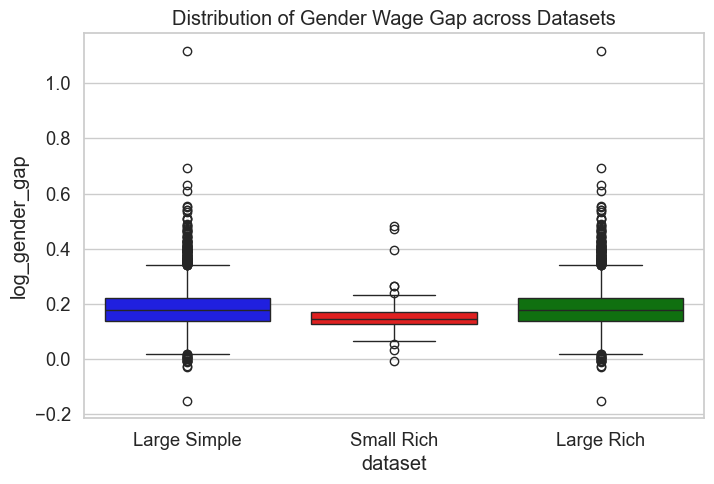

In [13]:

df_long = pd.concat([
    pd.DataFrame({"dataset": "Large Simple", "log_gender_gap": dataset_large_simple["log_gender_gap"]}),
    pd.DataFrame({"dataset": "Small Rich",  "log_gender_gap": dataset_small_rich["log_gender_gap"]}),
    pd.DataFrame({"dataset": "Large Rich",  "log_gender_gap": dataset_large_rich["log_gender_gap"]}),
])


df_long = df_long[np.isfinite(df_long["log_gender_gap"])]


plt.figure(figsize=(8,5))
sns.boxplot(x="dataset", y="log_gender_gap", data=df_long,
            palette=["blue","red","green"], showfliers=True)

plt.title("Distribution of Gender Wage Gap across Datasets")
plt.show()

In [15]:
from scipy import stats  

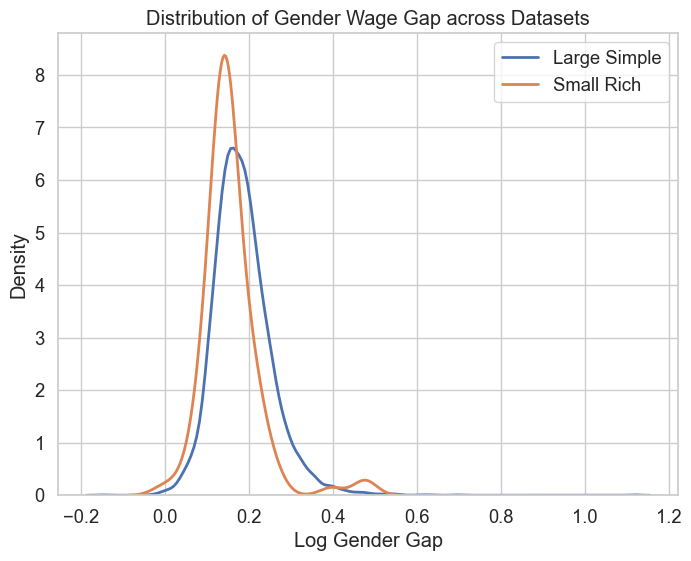

=== Large Simple ===
T-statistic: 190.835, P-value: 0.00000e+00
Gender wage gap is statistically significant (mean = 0.184 > 0).

=== Small Rich ===
T-statistic: 22.606, P-value: 7.08107e-41
Gender wage gap is statistically significant (mean = 0.156 > 0).

=== Large Rich ===
T-statistic: 190.835, P-value: 0.00000e+00
Gender wage gap is statistically significant (mean = 0.184 > 0).



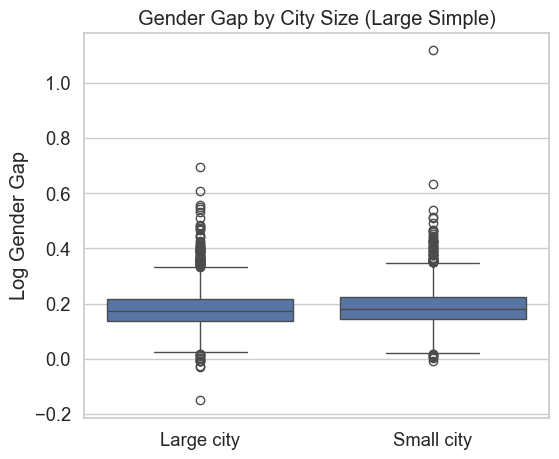

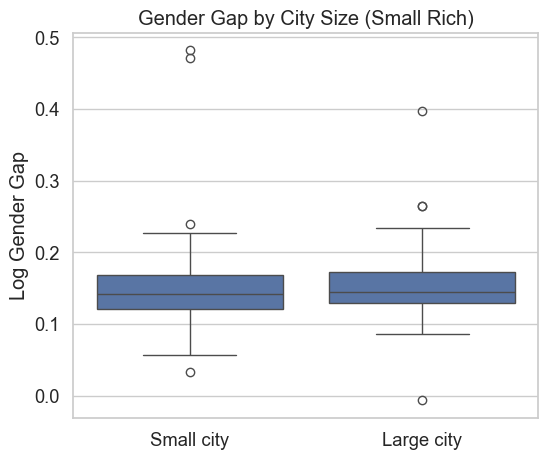

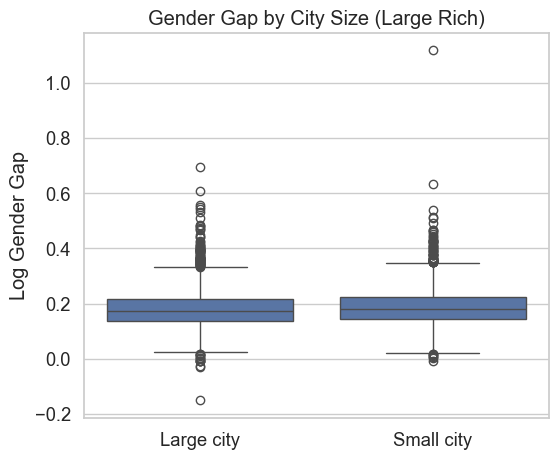

In [19]:
plt.figure(figsize=(8,6))
sns.kdeplot(dataset_large_simple['log_gender_gap'], label="Large Simple", linewidth=2)
sns.kdeplot(dataset_small_rich['log_gender_gap'], label="Small Rich", linewidth=2)
plt.xlabel("Log Gender Gap")
plt.ylabel("Density")
plt.title("Distribution of Gender Wage Gap across Datasets")
plt.legend()
plt.show()


datasets = {
    "Large Simple": dataset_large_simple,
    "Small Rich": dataset_small_rich,
    "Large Rich": dataset_large_rich
}

for name, df in datasets.items():
    t_stat, p_value = stats.ttest_1samp(df['log_gender_gap'], 0)
    mean_gap = df['log_gender_gap'].mean()
    print(f"=== {name} ===")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5e}")
    if p_value < 0.05:
        print(f"Gender wage gap is statistically significant (mean = {mean_gap:.3f} > 0).")
    else:
        print("No significant wage gap found.")
    print()


def plot_gap_by_city_size(df, name):
    median_pop = df['population_total'].median()
    df['city_size'] = df['population_total'].apply(
        lambda x: "Large city" if x > median_pop else "Small city"
    )
    
    plt.figure(figsize=(6,5))
    sns.boxplot(x="city_size", y="log_gender_gap", data=df)
    plt.title(f"Gender Gap by City Size ({name})")
    plt.xlabel("")
    plt.ylabel("Log Gender Gap")
    plt.show()

plot_gap_by_city_size(dataset_large_simple, "Large Simple")
plot_gap_by_city_size(dataset_small_rich, "Small Rich")
plot_gap_by_city_size(dataset_large_rich, "Large Rich")


In [161]:
common_cities = dataset_small_rich['city_code'].unique()
simple_100 = dataset_large_simple[dataset_large_simple['city_code'].isin(common_cities)]
rich_100 = dataset_large_rich[dataset_large_rich['city_code'].isin(common_cities)]
small_100 = dataset_small_rich.copy() 

features_common = [
    "avg_salary", "avg_salary_female", "avg_salary_male", "log_gender_gap",
    "population_total", "population_female", "vote_macron_share"
]


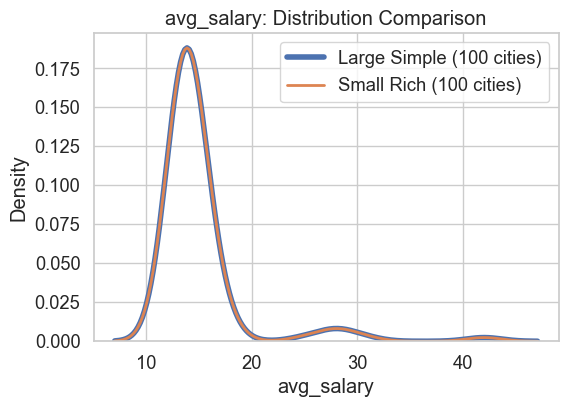

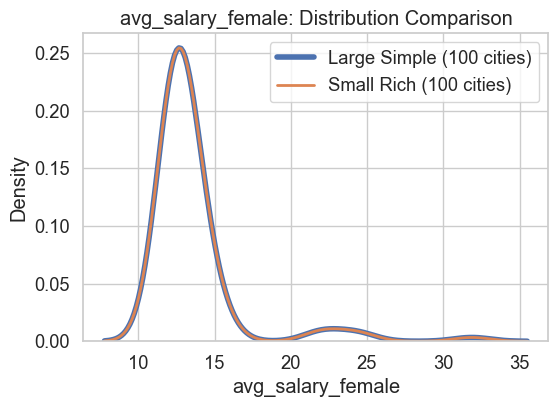

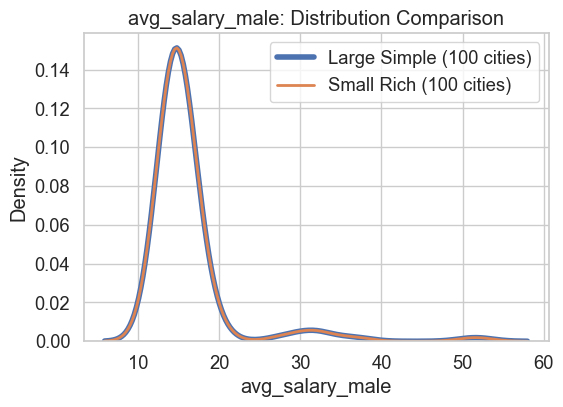

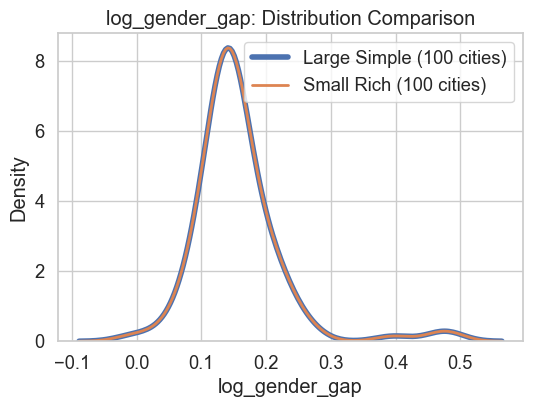

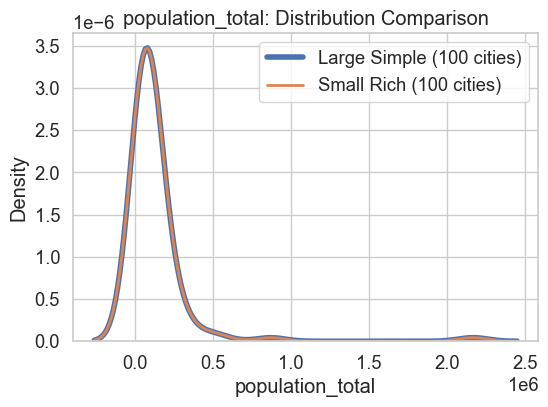

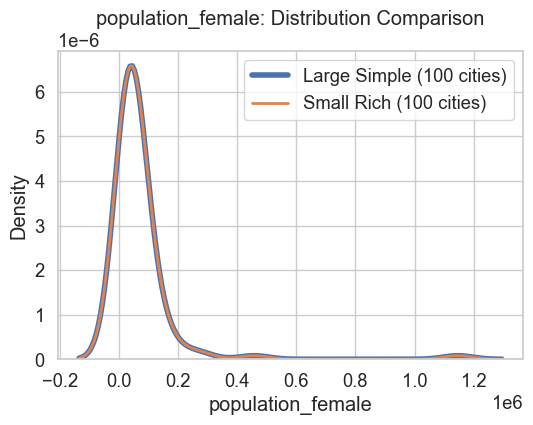

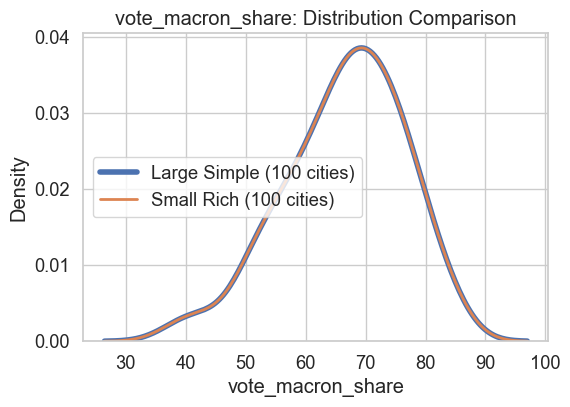

             Feature  Correlation
0         avg_salary            1
1  avg_salary_female            1
2    avg_salary_male            1
3     log_gender_gap            1
4   population_total            1
5  population_female            1
6  vote_macron_share            1


In [166]:
for feat in features_common:
    plt.figure(figsize=(6,4))
    sns.kdeplot(simple_100[feat], label="Large Simple (100 cities)", linewidth=4)
    sns.kdeplot(small_100[feat], label="Small Rich (100 cities)", linewidth=2)
    plt.title(f"{feat}: Distribution Comparison")
    plt.legend()
    plt.show()


merged = simple_100[["city_code"] + features_common].merge(
    small_100[["city_code"] + features_common],
    on="city_code", suffixes=("_simple", "_small")
)

correlations = []
for feat in features_common:
    corr = merged[f"{feat}_simple"].corr(merged[f"{feat}_small"])
    correlations.append({"Feature": feat, "Correlation": corr})


correlation_table = pd.DataFrame(correlations)
print(correlation_table)


In [ ]:
base_features = [
    'city_name','city_code'
    'avg_salary', 'avg_salary_female', 'avg_salary_male', 
    'log_gender_gap', 'population_total', 'population_30_44',
    'population_female', 'population_cs3', 'latitude', 
    'longitude', 'vote_macron_share',
]

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from tqdm import tqdm


df = pd.read_csv("../data/processed/dataset_small_rich.csv")

if 'Chomage' in df.columns:
    q_low, q_high = df['Chomage'].quantile([0.01, 0.99])  
    df['Chomage'] = df['Chomage'].clip(lower=q_low, upper=q_high)


target_features = df.columns[13:]


base_features = [
    'avg_salary', 'avg_salary_female', 'avg_salary_male', 
    'log_gender_gap', 'population_total', 'population_30_44',
    'population_female', 'population_cs3', 'latitude', 
    'longitude', 'vote_macron_share',
]
target_features = df.columns[13:] 



df[base_features] = df[base_features].apply(pd.to_numeric, errors='coerce')
df[target_features] = df[target_features].apply(pd.to_numeric, errors='coerce')


n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

all_results = []


for split, (train_indices, test_indices) in enumerate(tqdm(kf.split(df), total=n_splits, desc="Cross-validation progress"), 1):

    df_train = df.iloc[train_indices].reset_index(drop=True)
    df_test = df.iloc[test_indices].reset_index(drop=True)

    X_train = df_train[base_features].values
    y_train = df_train[target_features].values
    X_test = df_test[base_features].values
    y_true = df_test[target_features].values


    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    def adaptive_knn_fill(X_ref, y_ref, X_fill, k_range=(3, 10)):
        filled_data = np.zeros((X_fill.shape[0], y_ref.shape[1]), dtype=float)
        max_k = max(k_range)
        nn = NearestNeighbors(n_neighbors=max_k).fit(X_ref)

        for i, point in enumerate(X_fill):
            dist, idx = nn.kneighbors(point.reshape(1, -1))
            dist = dist[0]; idx = idx[0]

            valid_k = min(max_k, len(idx))
            k = min(3, valid_k) if dist[0] > 2 * np.median(dist) else min(7, valid_k)

            sigma = np.median(dist[:k])
            if sigma < 1e-8:  
                w = np.ones(k) / k
            else:
                w = np.exp(-dist[:k]**2 / (2 * sigma**2))
                w /= w.sum()

            filled_data[i] = np.sum(w[:, None] * y_ref[idx[:k]], axis=0)
        return filled_data


    y_pred = adaptive_knn_fill(X_train_scaled, y_train, X_test_scaled)


    for i, col in enumerate(target_features):
        true_vals = y_true[:, i]
        pred_vals = y_pred[:, i]

        mask = ~np.isnan(true_vals) & ~np.isnan(pred_vals)
        if np.sum(mask) < 2: 
            continue

        true_vals_clean = true_vals[mask]
        pred_vals_clean = pred_vals[mask]

        mse = mean_squared_error(true_vals_clean, pred_vals_clean)
        rmse = np.sqrt(mse)
        r2 = r2_score(true_vals_clean, pred_vals_clean)
        mae = mean_absolute_error(true_vals_clean, pred_vals_clean)

        all_results.append({
            'feature': col,
            'split': split,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        })


results_df = pd.DataFrame(all_results)
summary_df = results_df.groupby('feature').agg({
    'R2': ['mean', 'std'],
    'RMSE': ['mean', 'std'],
    'MAE': ['mean', 'std']
}).round(4)

summary_df.columns = ['R2_mean', 'R2_std', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std']
summary_df = summary_df.sort_values('R2_mean', ascending=False)

print("=== KNN Filling Performance Evaluation (5-fold Cross-Validation) ===")
print(summary_df.to_string())


good_fill = summary_df[summary_df['R2_mean'] > 0.3]
medium_fill = summary_df[(summary_df['R2_mean'] >= 0) & (summary_df['R2_mean'] <= 0.3)]
poor_fill = summary_df[summary_df['R2_mean'] < 0]

print(f"\nFeature Filling Performance Classification:")
print(f"  Features with Good Filling Performance (R² > 0.3): {len(good_fill)}")
print(f"  Features with Average Filling Performance (0 ≤ R² ≤ 0.3): {len(medium_fill)}")
print(f"  Features with Poor Filling Performance (R² < 0): {len(poor_fill)}")

Cross-validation progress: 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]


=== KNN Filling Performance Evaluation (5-fold Cross-Validation) ===
                        R2_mean  R2_std  RMSE_mean   RMSE_std   MAE_mean   MAE_std
feature                                                                           
Temperature              0.7355  0.1030     0.8362     0.1617     0.5979    0.0976
Soleil                   0.7063  0.0922   179.0981    23.0440   118.6825   12.3869
SalaireAnnuel            0.6155  0.2435  2095.6635  1647.3954  1017.9407  575.5720
Pluie                    0.6121  0.1091    13.2438     1.3023     8.9959    1.4764
Mer                      0.5349  0.0861     0.4907     0.0684     0.3643    0.0629
Imposables               0.5316  0.2355     4.5828     0.4155     3.4407    0.3049
ImpotRevenu              0.5304  0.3258   782.5681   880.6786   324.2224  227.9189
MetreCarreAncien         0.5044  0.1799   423.2386   130.3875   232.3867   60.7422
ImpotFortune             0.4839  0.3376     0.0102     0.0113     0.0042    0.0029
Ski               

global overview

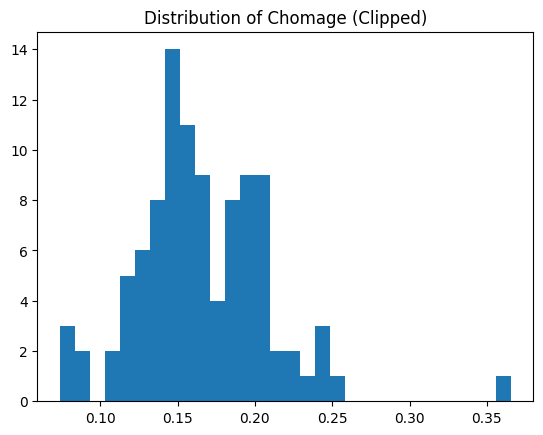

count    100.000000
mean       0.166124
std        0.043367
min        0.073950
25%        0.139750
50%        0.160000
75%        0.194250
max        0.365450
Name: Chomage, dtype: float64


In [96]:
plt.hist(df['Chomage'].dropna(), bins=30)
plt.title("Distribution of Chomage (Clipped)")
plt.show()

print(df['Chomage'].describe())


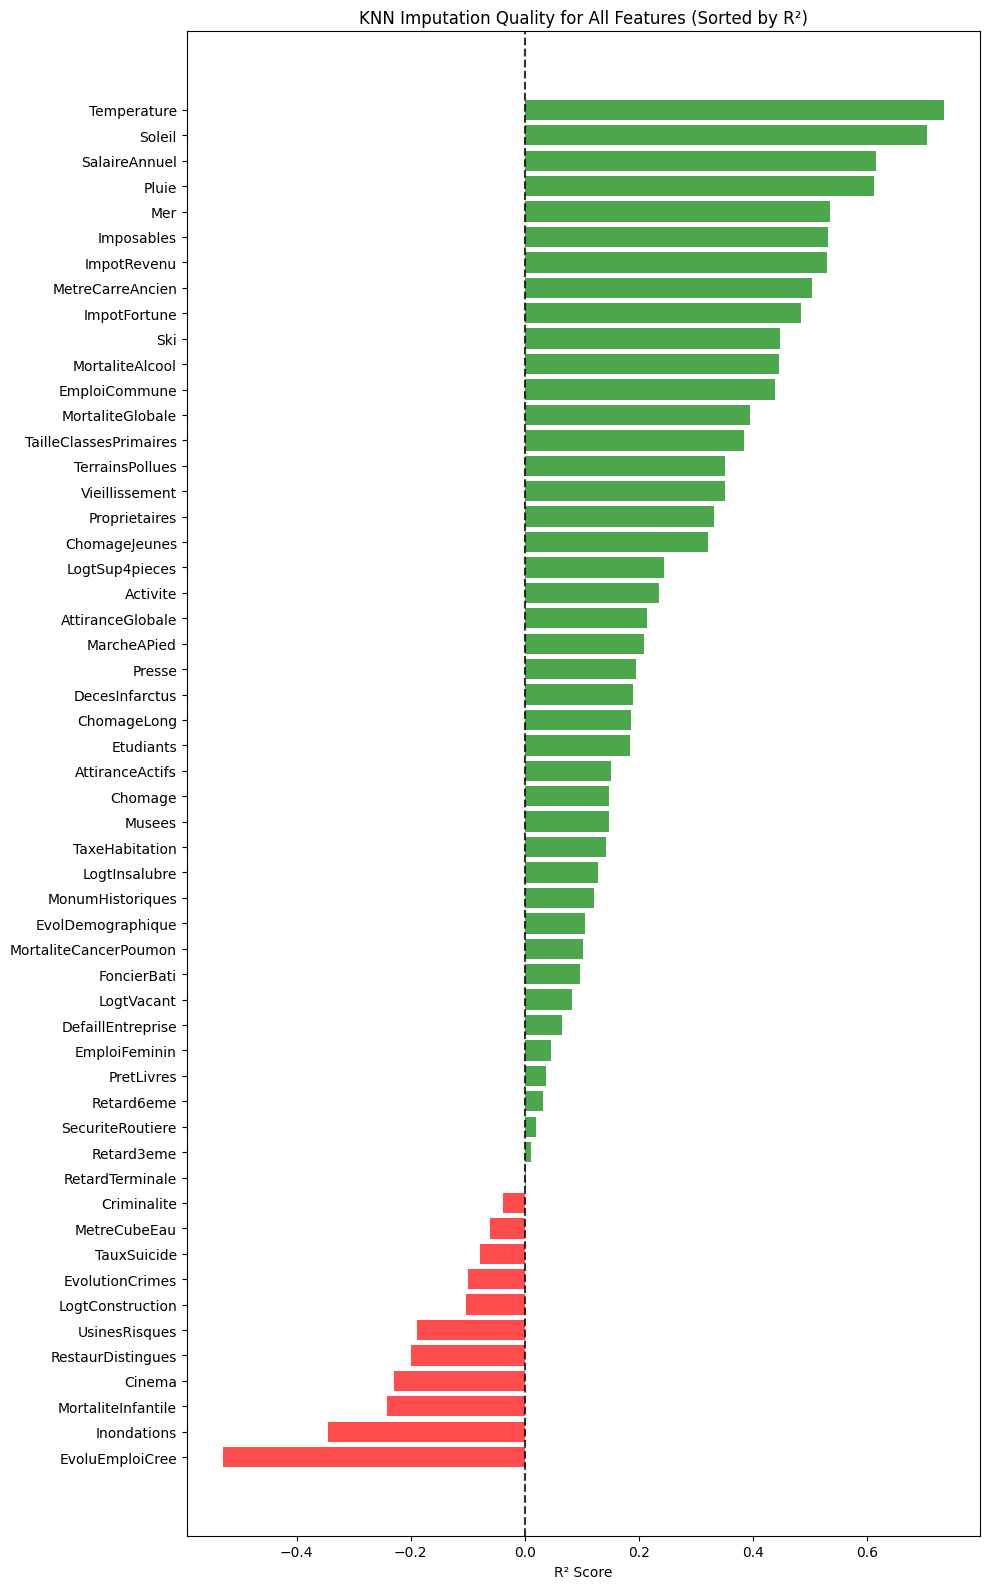

In [97]:
import matplotlib.pyplot as plt


df_plot = summary_df.sort_values('R2_mean', ascending=True)


colors = ['red' if x < 0 else 'green' for x in df_plot['R2_mean']]

plt.figure(figsize=(10, 16))
plt.barh(range(len(df_plot)), df_plot['R2_mean'], color=colors, alpha=0.7)


plt.yticks(range(len(df_plot)), df_plot.index)


plt.axvline(x=0, color='black', linestyle='--', alpha=0.8)

plt.xlabel('R² Score')
plt.title('KNN Imputation Quality for All Features (Sorted by R²)')

plt.tight_layout()
plt.show()


Cross-validation:   0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation: 100%|██████████| 5/5 [00:00<00:00,  6.12it/s]


=== KNN Filling Performance Evaluation (5-fold Cross-Validation) ===
                        R2_mean  R2_std  RMSE_mean   RMSE_std   MAE_mean   MAE_std
feature                                                                           
Temperature              0.7355  0.1030     0.8362     0.1617     0.5979    0.0976
Soleil                   0.7063  0.0922   179.0981    23.0440   118.6825   12.3869
SalaireAnnuel            0.6155  0.2435  2095.6635  1647.3954  1017.9407  575.5720
Pluie                    0.6121  0.1091    13.2438     1.3023     8.9959    1.4764
Mer                      0.5349  0.0861     0.4907     0.0684     0.3643    0.0629
Imposables               0.5316  0.2355     4.5828     0.4155     3.4407    0.3049
ImpotRevenu              0.5304  0.3258   782.5681   880.6786   324.2224  227.9189
MetreCarreAncien         0.5044  0.1799   423.2386   130.3875   232.3867   60.7422
ImpotFortune             0.4839  0.3376     0.0102     0.0113     0.0042    0.0029
Ski               

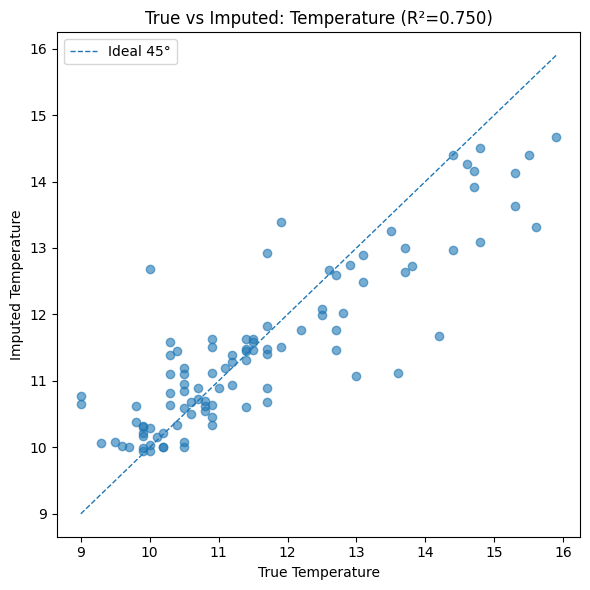

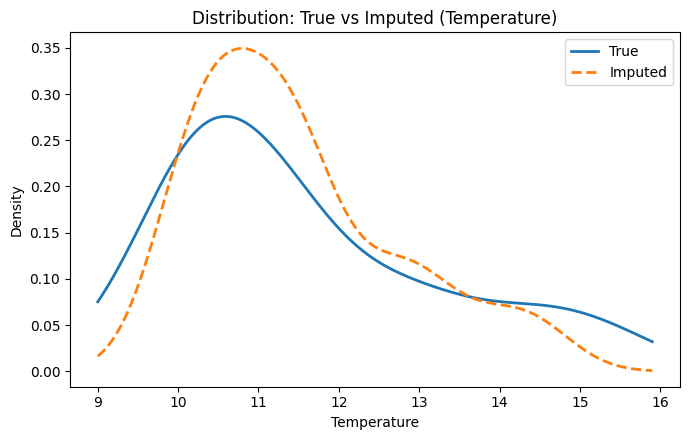

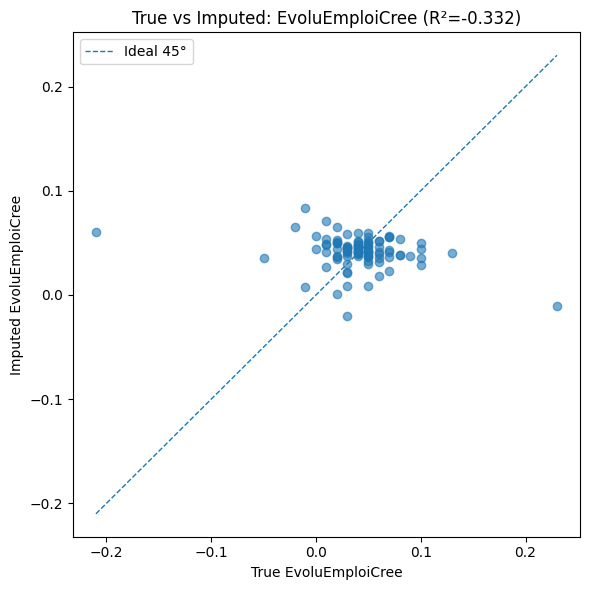

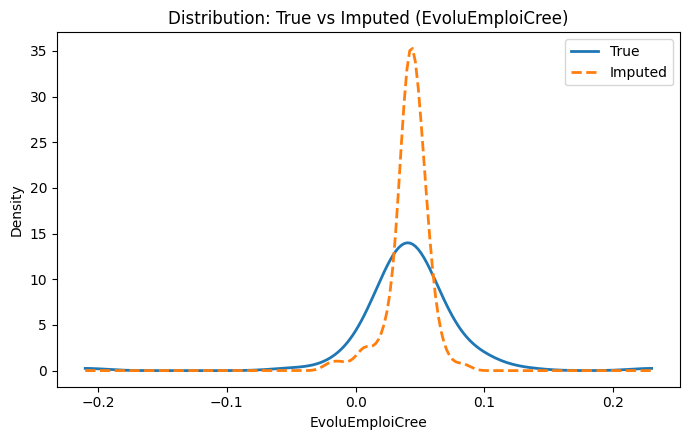

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from tqdm import tqdm


df = pd.read_csv("../data/processed/dataset_small_rich.csv")


if 'Chomage' in df.columns:
    q_low, q_high = df['Chomage'].quantile([0.01, 0.99])
    df['Chomage'] = df['Chomage'].clip(lower=q_low, upper=q_high)

base_features = [
    'avg_salary', 'avg_salary_female', 'avg_salary_male',
    'log_gender_gap', 'population_total', 'population_30_44',
    'population_female', 'population_cs3', 'latitude',
    'longitude', 'vote_macron_share',
]
target_features = list(df.columns[13:])


df[base_features] = df[base_features].apply(pd.to_numeric, errors='coerce')
df[target_features] = df[target_features].apply(pd.to_numeric, errors='coerce')


def adaptive_knn_fill(X_ref, y_ref, X_fill, k_range=(3, 10)):
    filled_data = np.zeros((X_fill.shape[0], y_ref.shape[1]), dtype=float)
    max_k = max(k_range)
    nn = NearestNeighbors(n_neighbors=max_k).fit(X_ref)
    for i, point in enumerate(X_fill):
        dist, idx = nn.kneighbors(point.reshape(1, -1))
        dist = dist[0]; idx = idx[0]
        valid_k = min(max_k, len(idx))
        k = min(3, valid_k) if dist[0] > 2 * np.median(dist[:valid_k]) else min(7, valid_k)
        sigma = np.median(dist[:k]) if k > 0 else 0.0
        if k == 0 or sigma < 1e-8:
            w = np.ones(max(1, k)) / max(1, k)
        else:
            w = np.exp(-dist[:k]**2 / (2 * sigma**2))
            s = w.sum()
            w = (w / s) if s > 0 else np.ones(k) / k
        filled_data[i] = np.sum(w[:, None] * y_ref[idx[:k]], axis=0)
    return filled_data


n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

all_results = []

preds_by_feature = {col: {"true": [], "pred": []} for col in target_features}

for split, (train_idx, test_idx) in enumerate(tqdm(kf.split(df), total=n_splits, desc="Cross-validation"), 1):
    df_train = df.iloc[train_idx].reset_index(drop=True)
    df_test  = df.iloc[test_idx].reset_index(drop=True)

    X_train = df_train[base_features].values
    y_train = df_train[target_features].values
    X_test  = df_test[base_features].values
    y_true  = df_test[target_features].values

    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)

    y_pred = adaptive_knn_fill(X_train_s, y_train, X_test_s)

    for i, col in enumerate(target_features):
        t = y_true[:, i]
        p = y_pred[:, i]
        m = ~np.isnan(t) & ~np.isnan(p)
        if m.sum() < 2: 
            continue
        t = t[m]; p = p[m]

        preds_by_feature[col]["true"].extend(t.tolist())
        preds_by_feature[col]["pred"].extend(p.tolist())


        mse = mean_squared_error(t, p); rmse = np.sqrt(mse)
        r2 = r2_score(t, p); mae = mean_absolute_error(t, p)
        all_results.append({"feature": col, "split": split, "RMSE": rmse, "MAE": mae, "R2": r2})


results_df = pd.DataFrame(all_results)
summary_df = results_df.groupby('feature').agg({
    'R2':   ['mean', 'std'],
    'RMSE': ['mean', 'std'],
    'MAE':  ['mean', 'std']
}).round(4)
summary_df.columns = ['R2_mean', 'R2_std', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std']
summary_df = summary_df.sort_values('R2_mean', ascending=False)

print("=== KNN Filling Performance Evaluation (5-fold Cross-Validation) ===")
print(summary_df.to_string())


def plot_true_vs_imputed(feature_name):
    if feature_name not in preds_by_feature:
        print(f"[WARN] feature '{feature_name}' not found.")
        return
    true_vals = np.array(preds_by_feature[feature_name]["true"], dtype=float)
    pred_vals = np.array(preds_by_feature[feature_name]["pred"], dtype=float)
    m = ~np.isnan(true_vals) & ~np.isnan(pred_vals)
    true_vals, pred_vals = true_vals[m], pred_vals[m]
    if true_vals.size < 2:
        print(f"[WARN] not enough data for '{feature_name}'.")
        return


    plt.figure(figsize=(6,6))
    plt.scatter(true_vals, pred_vals, alpha=0.6)
    lo = float(min(true_vals.min(), pred_vals.min()))
    hi = float(max(true_vals.max(), pred_vals.max()))
    plt.plot([lo, hi], [lo, hi], linestyle='--', linewidth=1, label="Ideal 45°")
    r2_here = r2_score(true_vals, pred_vals)
    plt.xlabel(f"True {feature_name}")
    plt.ylabel(f"Imputed {feature_name}")
    plt.title(f"True vs Imputed: {feature_name} (R²={r2_here:.3f})")
    plt.legend()
    plt.tight_layout()
    plt.show()


    try:
        from scipy.stats import gaussian_kde
        grid = np.linspace(min(true_vals.min(), pred_vals.min()),
                           max(true_vals.max(), pred_vals.max()), 200)
        kde_true = gaussian_kde(true_vals)
        kde_pred = gaussian_kde(pred_vals)
        plt.figure(figsize=(7,4.5))
        plt.plot(grid, kde_true(grid), linewidth=2, label="True")
        plt.plot(grid, kde_pred(grid), linewidth=2, linestyle="--", label="Imputed")
        plt.xlabel(feature_name); plt.ylabel("Density")
        plt.title(f"Distribution: True vs Imputed ({feature_name})")
        plt.legend(); plt.tight_layout(); plt.show()
    except Exception:
       
        plt.figure(figsize=(7,4.5))
        plt.hist(true_vals, bins='auto', density=True, alpha=0.5, label="True")
        plt.hist(pred_vals, bins='auto', density=True, alpha=0.5, label="Imputed")
        plt.xlabel(feature_name); plt.ylabel("Density")
        plt.title(f"Distribution: True vs Imputed ({feature_name})")
        plt.legend(); plt.tight_layout(); plt.show()


plot_true_vs_imputed("Temperature")
plot_true_vs_imputed("EvoluEmploiCree")


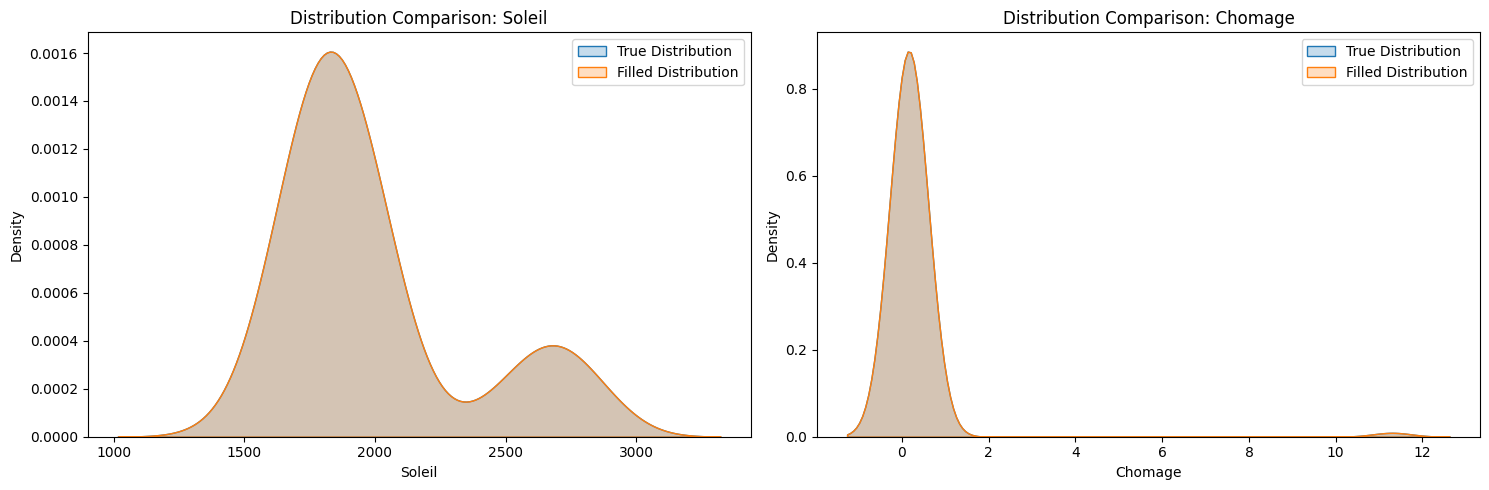

In [56]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


sns.kdeplot(df_true_100[best_feature], label='True Distribution', fill=True, ax=ax1)
sns.kdeplot(df_filled_100[best_feature], label='Filled Distribution', fill=True, ax=ax1)
ax1.set_title(f'Distribution Comparison: {best_feature}')
ax1.legend()


sns.kdeplot(df_true_100[worst_feature], label='True Distribution', fill=True, ax=ax2)
sns.kdeplot(df_filled_100[worst_feature], label='Filled Distribution', fill=True, ax=ax2)
ax2.set_title(f'Distribution Comparison: {worst_feature}')
ax2.legend()


plt.tight_layout()
plt.show()


Top 10 features correlated with log_gender_gap:
avg_salary_male           0.829974
avg_salary                0.805607
SalaireAnnuel             0.783036
ImpotRevenu               0.725126
avg_salary_female         0.720349
ImpotFortune              0.719214
MetreCarreAncien          0.700661
Imposables                0.669883
Retard6eme               -0.475268
TailleClassesPrimaires    0.459723
FoncierBati              -0.441160
RetardTerminale          -0.440008
Retard3eme               -0.417953
TaxeHabitation           -0.297801
MortaliteGlobale         -0.278583
ChomageLong              -0.266543
DefaillEntreprise        -0.234556
Criminalite              -0.232081
MortaliteAlcool          -0.226879
ChomageJeunes            -0.224219
AttiranceActifs           0.198661
EmploiCommune            -0.197190
vote_macron_share         0.194270
MortaliteCancerPoumon    -0.188630
LogtInsalubre             0.184666
latitude                  0.183309
EmploiFeminin             0.178729
Presse 

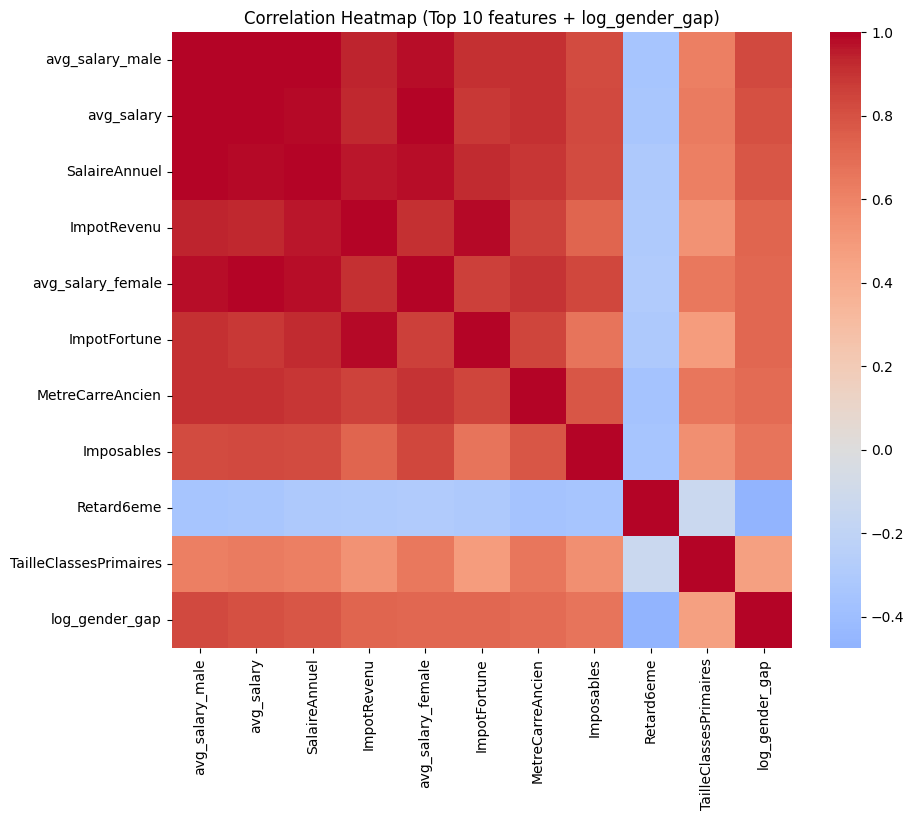

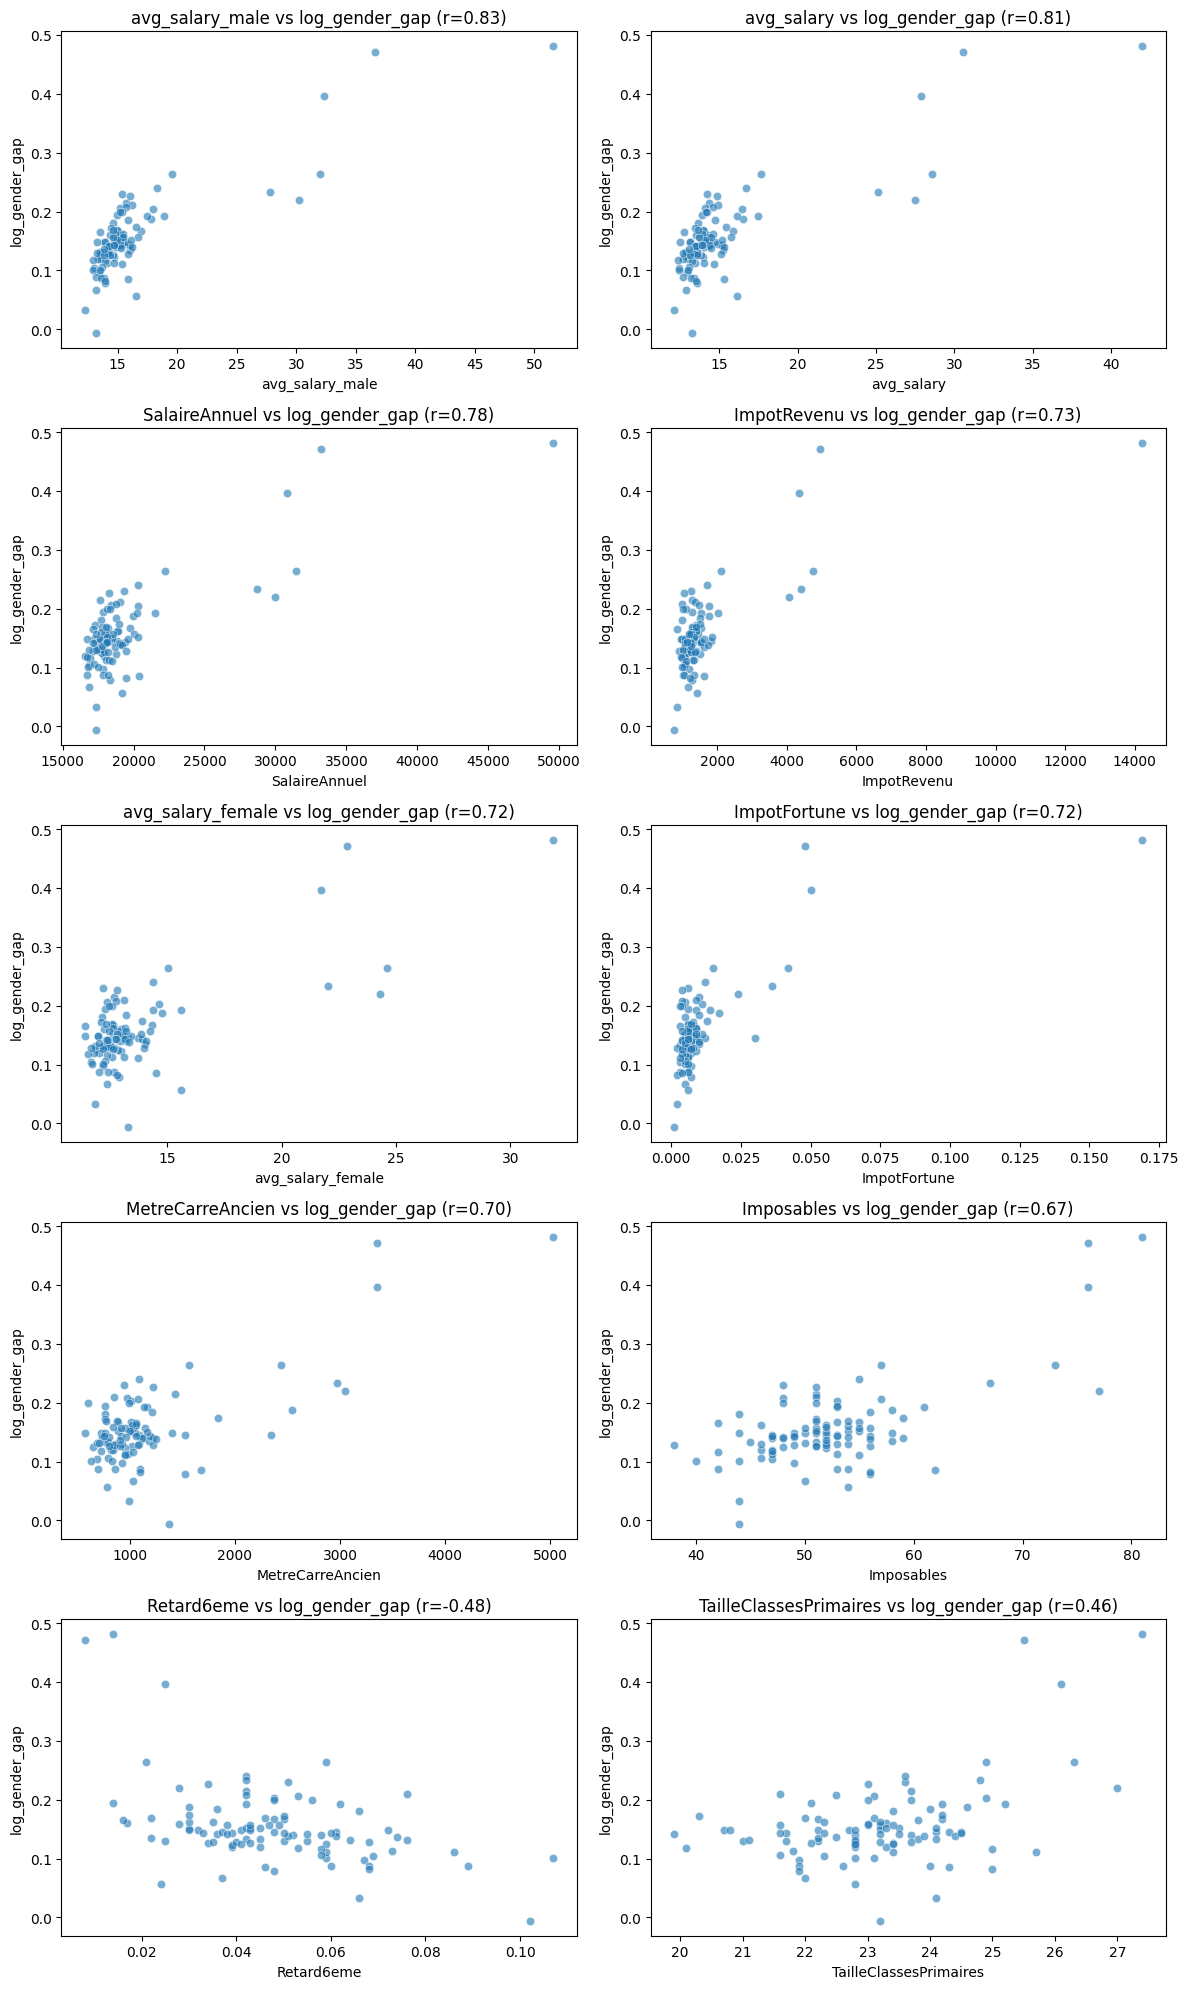

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/processed/dataset_small_rich.csv")


num_cols = df.select_dtypes(include=[np.number]).columns.tolist()


target = 'log_gender_gap'


corr_matrix = df[num_cols].corr()


target_corr = corr_matrix[target].drop(target).sort_values(key=lambda x: abs(x), ascending=False)

print("Top 10 features correlated with log_gender_gap:")
print(target_corr.head(50))


plt.figure(figsize=(10, 8))
top_features = target_corr.head(10).index.tolist() + [target]
sns.heatmap(df[top_features].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Top 10 features + log_gender_gap)")
plt.show()


top10_features = target_corr.head(10).index.tolist()

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()

for i, feature in enumerate(top10_features):
    sns.scatterplot(x=df[feature], y=df[target], alpha=0.6, ax=axes[i])
    axes[i].set_title(f"{feature} vs {target} (r={target_corr[feature]:.2f})")

plt.tight_layout()
plt.show()


In [117]:
dataset_large_rich.vote_macron_share

0       54.14
1       48.76
2       60.65
3       53.96
4       50.96
        ...  
5258    49.27
5259    72.68
5260    48.66
5261    52.71
5262    67.76
Name: vote_macron_share, Length: 5263, dtype: float64

# politics

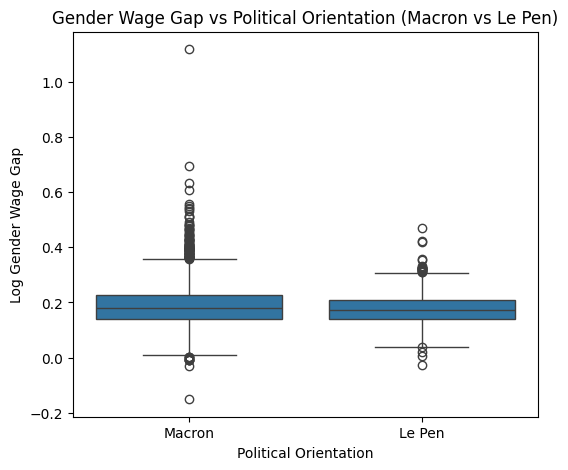

In [120]:
df = dataset_large_simple

df['political_group'] = np.where(df['vote_macron_share'] >= 50, 'Macron', 'Le Pen')


plt.figure(figsize=(6,5))
sns.boxplot(x="political_group", y="log_gender_gap", data=df)
plt.title("Gender Wage Gap vs Political Orientation (Macron vs Le Pen)")
plt.ylabel("Log Gender Wage Gap")
plt.xlabel("Political Orientation")
plt.show()

In [124]:
female_higher = df[df['avg_salary_female'] >= df['avg_salary_male']]

print(f"Number of cities where female >= male salary: {len(female_higher)}")
print("Examples of these cities:")
print(female_higher[['Ville', 'avg_salary_female', 'avg_salary_male']].head(10))


Number of cities where female >= male salary: 9
Examples of these cities:
              Ville  avg_salary_female  avg_salary_male
49            Ornex          14.446941        12.426501
324         Leucate          12.366728        12.053258
800        Aubusson          10.719579        10.646101
5095  Aubervilliers          12.099082        11.755222
5101     Le Bourget          12.877612        12.770989
5104   La Courneuve          11.337760        11.337041
5114      Montreuil          16.559958        16.400288
5119         Pantin          14.965649        14.855161
5126     SaintDenis          13.295792        13.208888


In [ ]:
import pandas as pd
import numpy as np
import folium
from folium import CircleMarker
from folium.plugins import MarkerCluster, MiniMap, Fullscreen
from branca.colormap import LinearColormap

lat_col, lon_col, city_col = "latitude", "longitude", "city_name"
male_col, fem_col, pop_col = "avg_salary_male", "avg_salary_female", "population_total"


for c in [lat_col, lon_col, male_col, fem_col, pop_col]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df = df.dropna(subset=[lat_col, lon_col, male_col, fem_col, pop_col]).copy()

df["gap_eur"] = df[male_col] - df[fem_col]


df_women = df[df["gap_eur"] < 0]
df_men   = df[df["gap_eur"] >= 0]


amax = df["gap_eur"].abs().quantile(0.98)
cmap = LinearColormap(
    ["#b2182b","#ef8a62","#fddbc7","#ffffff","#d1e5f0","#67a9cf","#2166ac"],
    vmin=-amax, vmax=amax
).to_step(21)


m = folium.Map(location=[46.6, 2.2], zoom_start=6, tiles="CartoDB positron")
MiniMap(toggle_display=True).add_to(m)
Fullscreen().add_to(m)


cluster_men = MarkerCluster(name="Men ≥ Women").add_to(m)
for _, r in df_men.iterrows():
    CircleMarker(
        location=[r[lat_col], r[lon_col]],
        radius=6,
        color=cmap(r["gap_eur"]),
        fill=True, fill_color=cmap(r["gap_eur"]),
        fill_opacity=0.7,
        tooltip=f"{r[city_col]} | Gap {r['gap_eur']:+.2f} €"
    ).add_to(cluster_men)


layer_women = folium.FeatureGroup(name="Women ≥ Men", show=True).add_to(m)
for _, r in df_women.iterrows():
    CircleMarker(
        location=[r[lat_col], r[lon_col]],
        radius=10,  
        color="black",
        weight=2,
        fill=True, fill_color="red",
        fill_opacity=0.9,
        tooltip=f"🔥 {r[city_col]} | Gap {r['gap_eur']:+.2f} €"
    ).add_to(layer_women)


cmap.caption = "Gender Gap (€): male − female"
cmap.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

m.save("gender_gap_map_highlight.html")

